In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

In [169]:
df_purchase=pd.read_csv('purchase data.csv')

In [170]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


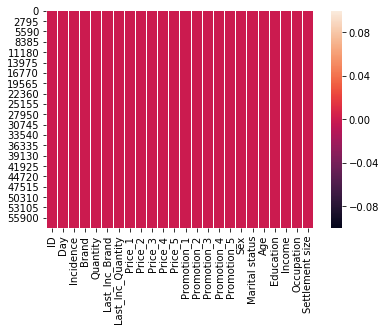

In [171]:
sns.heatmap(df_purchase.isnull())

In [172]:
scalar=pickle.load(open('scalar.pickle','rb'))

In [173]:
pca=pickle.load(open('pca.pickle','rb'))

In [174]:
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))

In [175]:
features=df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_seg_std=scalar.transform(features)

In [176]:
df_purchase_seg_pca=pca.transform(df_purchase_seg_std)

In [177]:
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_seg_pca)

In [178]:
df_purchase_predictors=df_purchase.copy()

In [179]:
df_purchase_predictors['Segment']=purchase_segm_kmeans_pca

In [180]:
df_purchase_descr.set_index(['ID'],inplace=True)

KeyError: "None of ['ID'] are in the columns"

In [ ]:
df_purchase_predictors.head()

In [94]:

tmp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).count()
tmp1.set_index('ID')
tmp1.rename({'Incidence':'No_Visits'})
tmp1.head()

,ID,Incidence
0,200000001,101
1,200000002,87
2,200000003,97
3,200000004,85
4,200000005,111


In [96]:
temp2 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).sum()
temp2.set_index('ID')
temp2.rename(columns= {'Incidence':'No_Purchases'})
temp2.head(5)

,ID,Incidence
0,200000001,9
1,200000002,11
2,200000003,10
3,200000004,11
4,200000005,13


In [107]:
temp3=tmp1.merge(temp2,how='left',on='ID',suffixes=('N_visits','N_purchases'))

In [108]:
temp3['Average Number of Purchases']=temp3['IncidenceN_purchases']/temp3['IncidenceN_visits']

In [109]:
temp3.head()

,ID,IncidenceN_visits,IncidenceN_purchases,Average Number of Purchases
0,200000001,101,9,0.089109
1,200000002,87,11,0.126437
2,200000003,97,10,0.103093
3,200000004,85,11,0.129412
4,200000005,111,13,0.117117


In [114]:
temp4 = df_purchase_predictors[['ID','Segment']].groupby(['ID'], as_index=False).mean()
df_purchase_descr=temp3.merge(temp4,how='left',on='ID',suffixes=('N_visits','N_purchases'))
df_purchase_descr.head(5)
df_purchase_descr.set_index('ID')

,IncidenceN_visits,IncidenceN_purchases,Average Number of Purchases,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,2
...,...,...,...,...
200000496,120,20,0.166667,1
200000497,120,43,0.358333,0
200000498,131,39,0.297710,1


In [125]:
#500 rows or just .shape
segm_prop=df_purchase_descr[['IncidenceN_purchases','Segment']].groupby(['Segment']).count()/500
segm_prop.rename(columns={'IncidenceN_purchases':'Segment Proportions'},inplace=True)
segm_prop.head()

,Segment Proportions
Segment,
0,0.378
1,0.206
2,0.220
3,0.196


Text(0.5, 1.0, 'Segment Proportons')

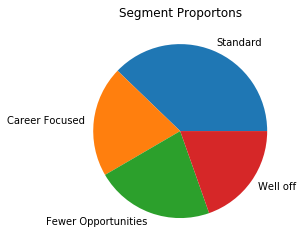

In [135]:
plt.figure(figsize=(10,4))
plt.pie(segm_prop['Segment Proportions'],labels=['Standard','Career Focused','Fewer Opportunities','Well off'])
plt.title('Segment Proportons')

In [145]:
segments_mean=df_purchase_descr.groupby(['Segment']).mean()

In [146]:
segments_mean.head()

,IncidenceN_visits,IncidenceN_purchases,Average Number of Purchases
Segment,,,
0,113.730159,22.756614,0.201588
1,117.699029,24.902913,0.212773
2,123.454545,39.827273,0.283102
3,117.295918,34.602041,0.284478


In [147]:
segments_std=df_purchase_descr.groupby(['Segment']).std()

In [148]:
segments_std

,IncidenceN_visits,IncidenceN_purchases,Average Number of Purchases
Segment,,,
0,16.410498,13.815040,0.120335
1,19.039605,16.774464,0.126603
2,44.864656,53.744530,0.200056
3,20.716152,25.900579,0.171787


Text(0.5, 1.0, 'Average Number of visits per segment')

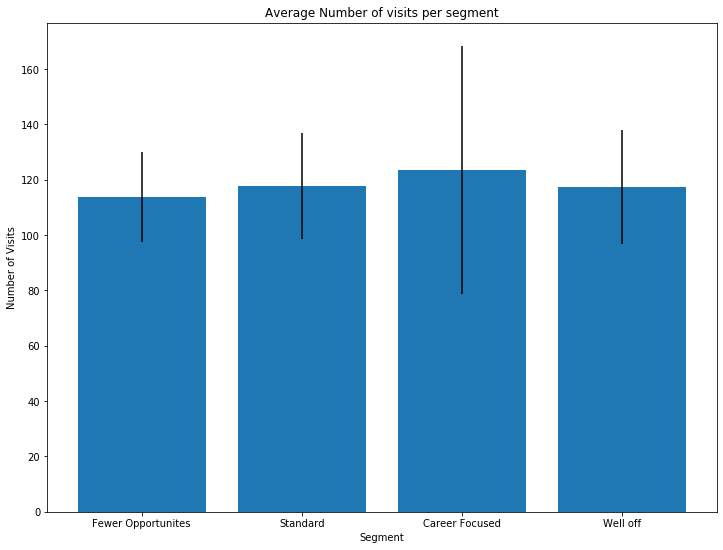

In [156]:
plt.figure(figsize=(12,9))
plt.bar(x=(0,1,2,3), tick_label=('Fewer Opportunites','Standard','Career Focused','Well off'),height=segments_mean['IncidenceN_visits'],yerr=segments_std['IncidenceN_visits'])
plt.xlabel('Segment')
plt.ylabel('Number of Visits')
plt.title('Average Number of visits per segment')

Text(0.5, 1.0, 'Number of Purchases per segment')

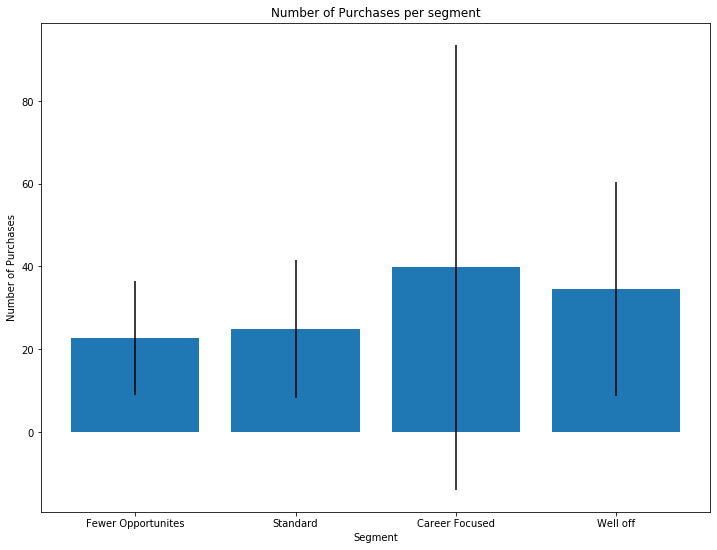

In [158]:
plt.figure(figsize=(12,9))
plt.bar(x=(0,1,2,3), tick_label=('Fewer Opportunites','Standard','Career Focused','Well off'),height=segments_mean['IncidenceN_purchases'],yerr=segments_std['IncidenceN_purchases'])
plt.xlabel('Segment')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases per segment')

Text(0.5, 1.0, 'Average Number of purchases per segment')

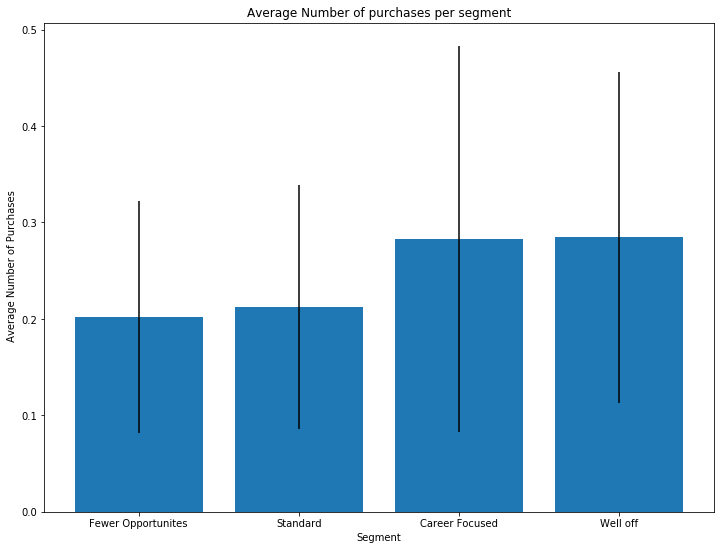

In [159]:
plt.figure(figsize=(12,9))
plt.bar(x=(0,1,2,3), tick_label=('Fewer Opportunites','Standard','Career Focused','Well off'),height=segments_mean['Average Number of Purchases'],yerr=segments_std['Average Number of Purchases'])
plt.xlabel('Segment')
plt.ylabel(' Average Number of Purchases')
plt.title('Average Number of purchases per segment')

In [161]:

#BRAND CHOICE
df_purchase_incidence=df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [162]:
brand_dummies=pd.get_dummies(df_purchase_incidence['Brand'],prefix='Brand',prefix_sep='_')
brand_dummies['Segment'], brand_dummies['ID']=df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,0,200000500
58648,1,0,0,0,0,0,200000500
58674,0,1,0,0,0,0,200000500
58687,0,1,0,0,0,0,200000500


In [191]:
temp=brand_dummies.groupby(['ID'], as_index=True).mean()
temp

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment
ID,,,,,,
200000001,0.111111,0.444444,0.000000,0.222222,0.222222,0
200000002,0.000000,0.090909,0.000000,0.909091,0.000000,3
200000003,0.000000,0.800000,0.000000,0.000000,0.200000,0
200000004,0.000000,0.090909,0.000000,0.000000,0.909091,0
200000005,0.000000,0.000000,0.000000,0.000000,1.000000,2
...,...,...,...,...,...,...
200000496,0.050000,0.700000,0.000000,0.050000,0.200000,1
200000497,0.023256,0.651163,0.000000,0.302326,0.023256,0
200000498,0.128205,0.589744,0.282051,0.000000,0.000000,1


In [189]:
mean_brand_choice=temp.groupby(['Segment'],as_index=True).mean()

In [190]:
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0,0.137567,0.681190,0.020923,0.061548,0.098772
1,0.251186,0.396502,0.156481,0.059474,0.136357
2,0.072871,0.146808,0.039976,0.112395,0.627951
3,0.041928,0.117422,0.030610,0.613623,0.196417


Text(0.5, 1, 'Avergae Brand Choice By Segment')

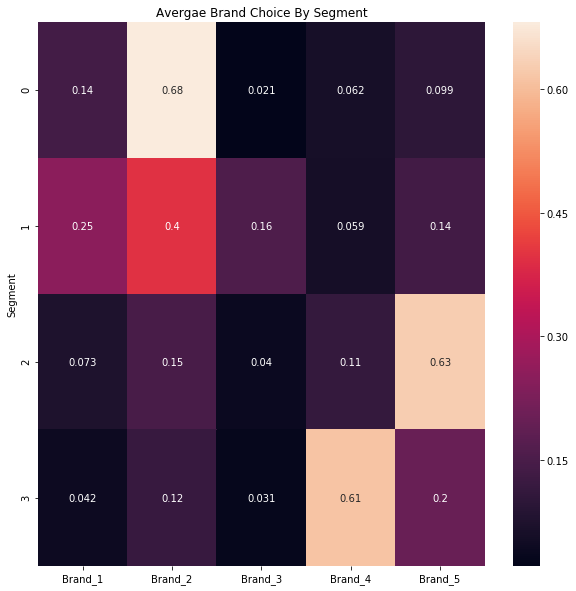

In [201]:
plt.figure(figsize=(10,10))
sns.heatmap(mean_brand_choice,annot=True)
plt.yticks=([0,1,2,3],['Fewer Opportunites','Standard','Career Focused','Well off'])
plt.title('Avergae Brand Choice By Segment')

In [299]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==1]
temp.loc[:,'Revenue Brand 1']= temp['Price_1']*temp['Quantity']
segment_brand_revenue=pd.DataFrame()
segment_brand_revenue[['Segment','Revenue Brand 1']]=temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'],as_index=False).sum()

In [300]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==2]
temp.loc[:,'Revenue Brand 2']= temp['Price_2']*temp['Quantity']
segment_brand_revenue[['Segment','Revenue Brand 2']]=temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'],as_index=False).sum()

In [301]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==3]
temp.loc[:,'Revenue Brand 3']= temp['Price_3']*temp['Quantity']
segment_brand_revenue[['Segment','Revenue Brand 3']]=temp[['Segment', 'Revenue Brand 3']].groupby(['Segment'],as_index=False).sum()

In [302]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==4]
temp.loc[:,'Revenue Brand 4']= temp['Price_1']*temp['Quantity']
segment_brand_revenue[['Segment','Revenue Brand 4']]=temp[['Segment', 'Revenue Brand 4']].groupby(['Segment'],as_index=False).sum()

In [303]:
temp=df_purchase_predictors[df_purchase_predictors['Brand']==5]
temp.loc[:,'Revenue Brand 5']= temp['Price_5']*temp['Quantity']
segment_brand_revenue[['Segment','Revenue Brand 5']]=temp[['Segment', 'Revenue Brand 5']].groupby(['Segment'],as_index=False).sum()

In [304]:
segment_brand_revenue['Total Revenue']=(segment_brand_revenue['Revenue Brand 1'] + segment_brand_revenue['Revenue Brand 2'] + segment_brand_revenue['Revenue Brand 3'] + segment_brand_revenue['Revenue Brand 4'] + segment_brand_revenue['Revenue Brand 5'] )

In [305]:
segment_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2258.90,13955.14,716.25,1050.32,2230.50,20211.11
1,1,2611.19,4768.52,3909.17,557.89,2439.75,14286.52
2,2,736.09,1746.42,664.75,1543.80,19441.06,24132.12
3,3,699.47,1298.23,731.35,9174.56,5509.69,17413.30


In [307]:
segment_brand_revenue['Segment Proportions']=segm_prop['Segment Proportions']
segment_brand_revenue['Segment']=segment_brand_revenue['Segment'].map({0:'Fewer Opprotunities',1:'Standard',2:'Career Focused',3:'Well off'})
segment_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
0,Fewer Opprotunities,2258.90,13955.14,716.25,1050.32,2230.50,20211.11,0.378
1,Standard,2611.19,4768.52,3909.17,557.89,2439.75,14286.52,0.206
2,Career Focused,736.09,1746.42,664.75,1543.80,19441.06,24132.12,0.220
3,Well off,699.47,1298.23,731.35,9174.56,5509.69,17413.30,0.196
